<a href="https://colab.research.google.com/github/salmaazouzi12/it_project/blob/main/ECon_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Introduction***


---


A Master of Business Administration (MBA also Master in Business Administration) is a professional postgraduate degree focused on business administration.

Many of the best MBA programs are **highly competitive** and will require more than just a strong GMAT score to land a coveted spot. On average, Harvard receives a whopping **9,773** applications and enrolls around **1,000** students, while Stanford receives around **7,370** applications and enrolls roughly **426** students each year.

In this project, we delve into MBA admissions data to uncover **the key factors influencing admission outcomes**. By employing various analytical techniques, including descriptive analysis and logistic regression.

We will explore the following questions:


*   Relationship between GPA and admission outcomes
*   Relationship between GMAT and admissions outcomes


*   Which one of the two is more important for MBA admissions ?
*   Does the choice of major affect acceptance odds ? If so, how ?


*   How do demographic factors affect admission results ?( male vs female, international vs domestic student, race)
*   What factor has the biggest impact ?

To asnwer this questions, we will be using a dataset of admission results from the class of 2025 of Wharton.
The Wharton School is the business school of the University of Pennsylvania, a private Ivy League research university in Philadelphia with prestigious personalities among its graduates such as Warren Buffet







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving MBA (3).csv to MBA (3).csv


In [ ]:
df = pd.read_csv('MBA (3).csv')

In [ ]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


1-Checking for missing data

In [ ]:
missing_data = df.isnull().sum()
missing_data

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,1842
gmat,0
work_exp,0
work_industry,0
admission,5194


2- Handling null entries

In [ ]:
# Replace null values in 'admission' column with 'Declined'
df = df.assign(admission=df['admission'].fillna('Declined'))

# Replace null values in 'race' column with "Not Disclosed"
df = df.assign(race=df['race'].fillna('Not Disclosed'))

# Check for Missing Data
missing_data = df.isnull().sum()
missing_data

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


3- Summary statistics

In [ ]:
df.describe()

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


Note : GMATs are scored from 200 to a maximum score of 800

**GPA:** Ranges from 2.65 to 3.77, with a mean of 3.25.

**GMAT:** Ranges from 570 to 780, with a mean of 651.

**Work Experience:** Ranges from 1 to 9 years, with a mean of 5 years.

- The average GMAT score (651) is above the global GMAT average (~560-600).

-The middle 50% (IQR) of GMAT scores are between 610 and 680.

- Most applicants have around 5 years of work experience.
- GPA values are tightly distributed (std = 0.15), meaning most applicants have similar GPAs


4- Visual distributions

4.1- GPA distribution

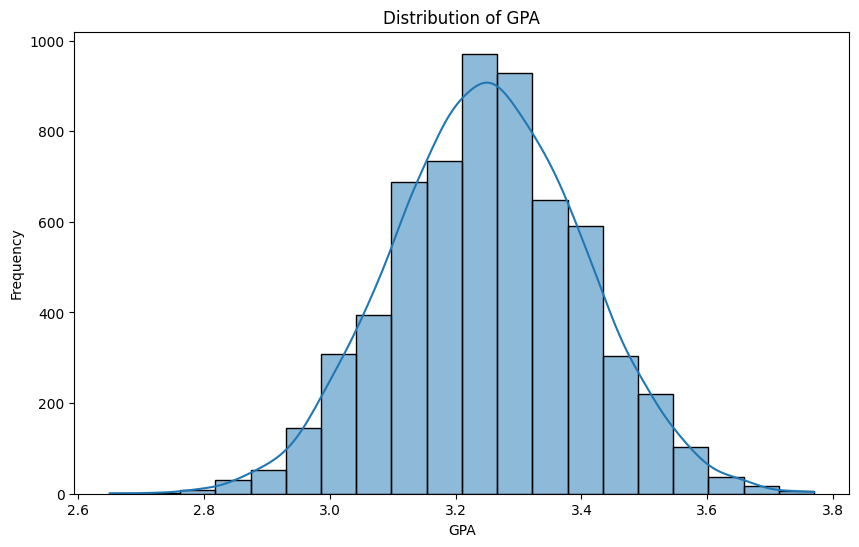

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['gpa'], bins=20, kde=True)
plt.title("Distribution of GPA")
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.show()

The GPA follows a **normal distribution**, as indicated by the bell-shaped curve.
*Most applicants have a GPA between 3.1 and 3.4.*

The mode is around 3.2-3.3 which aligns with the dataset’s mean GPA of 3.25.
The distribution is symmetrical, meaning no extreme skewness.

4.2- GMAT distribution


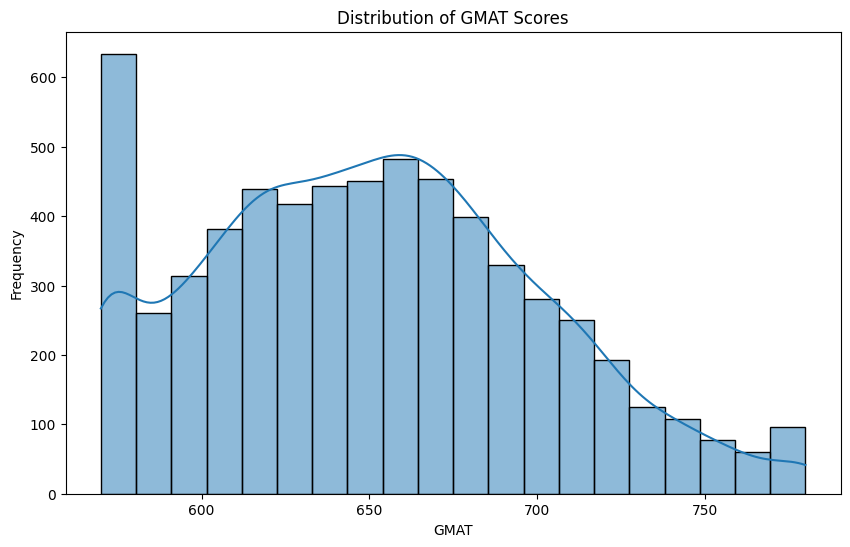

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['gmat'], bins=20, kde=True)
plt.title('Distribution of GMAT Scores')
plt.xlabel('GMAT')
plt.ylabel('Frequency')
plt.show()

The gradual decrease in frequency towards the lower ends of the scale suggests that achieving very high (700+)  GMAT scores is less common. This provides context on the relative difficulty of scoring at the extremes of the scale.

- The high frequency of scores in the 600-700 range implies a competitive applicant pool for programs that use GMAT scores as part of their admissions criteria.

5- Categorical variables analysis :

5.1- Gender :

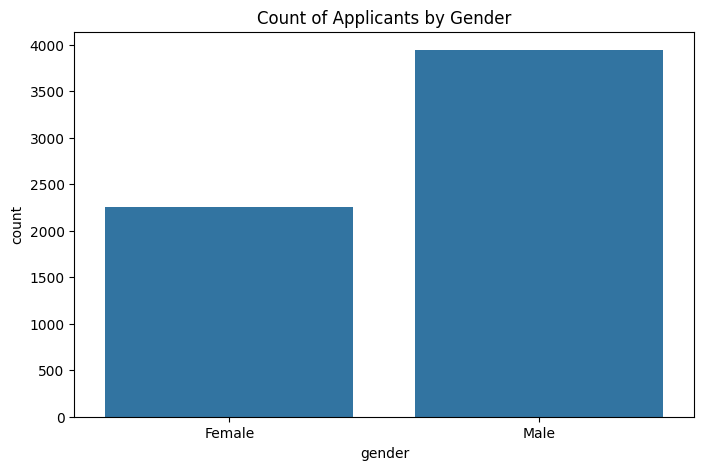

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df)
plt.title('Count of Applicants by Gender')
plt.show()

The number of female applicants are around 2250 which is a little more than half the total number of male applicants

5.2- Majors :

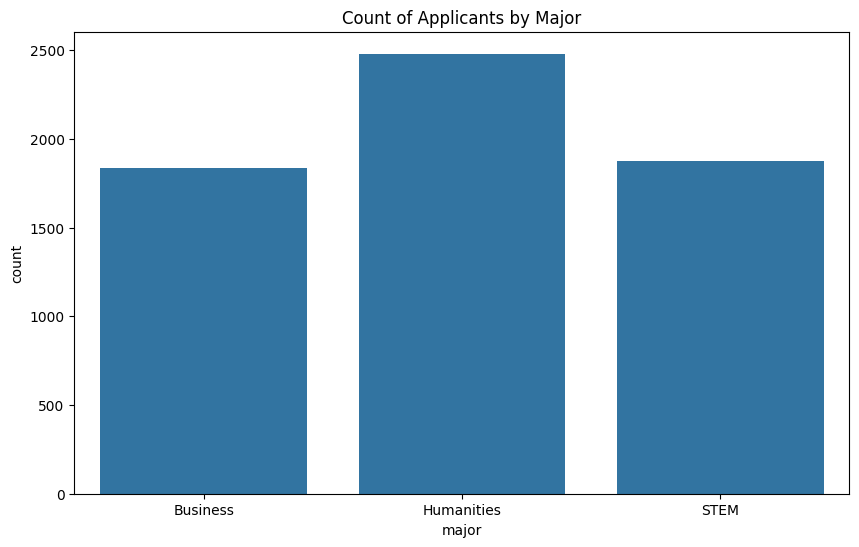

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='major', data=df)
plt.title('Count of Applicants by Major')
plt.show()

STEM and business majors have nearly the same number of applicants, whereas humanities majors surpass them slightly by nearly 500 applicants

5.3- Race :

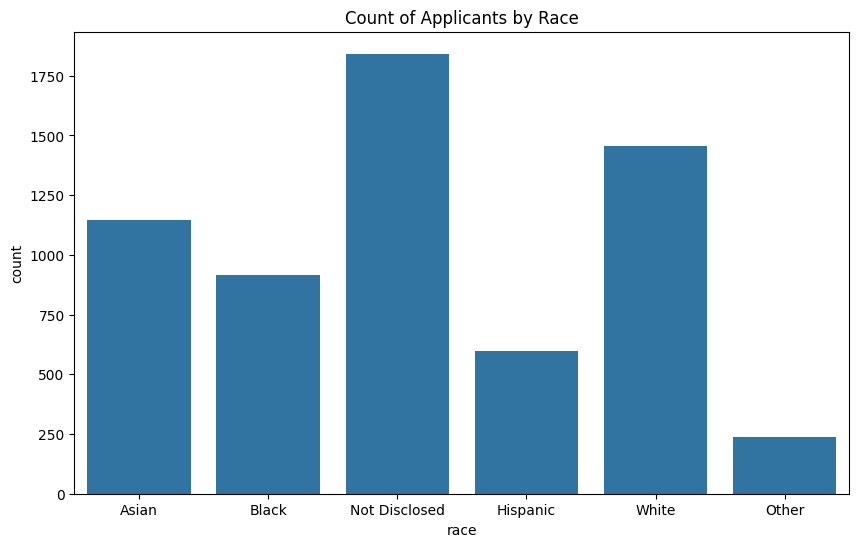

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='race', data=df)
plt.title('Count of Applicants by Race')
plt.show()

A great deal of the race criteria is undisclosed, but we can observe that the number of applicants is still predominantely white with the hispanic race ranking last.


6- Analysis of Key Questions

6.1- Relationship Between GPA and Admission Outcomes :

<ipython-input-21-05e77b5d45ab>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="admission", y="gpa", data=df, palette={"Admit": "#35B779FF", "Waitlist": "#440154FF", "Declined": "#31688EFF"})


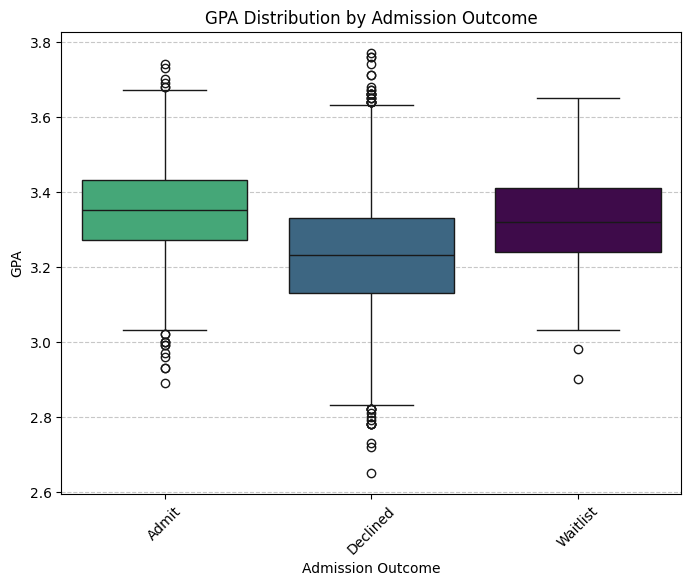

In [ ]:
import matplotlib.pyplot as plt

# Group by admission and calculate summary statistics
gpa_summary = df.groupby("admission").agg(
    mean_gpa=pd.NamedAgg(column="gpa", aggfunc="mean"),
    median_gpa=pd.NamedAgg(column="gpa", aggfunc="median"),
    sd_gpa=pd.NamedAgg(column="gpa", aggfunc="std")
).reset_index()

# Visualization: GPA distribution by admission outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x="admission", y="gpa", data=df, palette={"Admit": "#35B779FF", "Waitlist": "#440154FF", "Declined": "#31688EFF"})
plt.title("GPA Distribution by Admission Outcome")
plt.xlabel("Admission Outcome")
plt.ylabel("GPA")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

-The GPA distribution for "Admit" applicants is the highest, with a median around 3.5 GPA.

- There is some overlap between the GPA distributions, indicating that **GPA alone does not fully determine the admission outcome**.

- The "Waitlist" and "Deny" distributions have a wider spread, **implying a more diverse range of GPAs among those outcomes**.

Let's check correlation between GPA and admissions
We will first map the "admission" column to a binary column

In [ ]:



df["admission_binary"] = df["admission"].map({"Admit": 1, "Declined": 0, "Waitlist": 0})

# Compute correlation
correlation = df["gpa"].corr(df["admission_binary"])
print("Correlation:", correlation)


Correlation: 0.2834039874279755


The correlation 0.2834. It is weak but still positive, indicating that higher GPA slightly increases the likelihood of admission.

6.2-Relationship Between GMAT Scores and Admission Outcomes

<ipython-input-39-9cd4b528d15d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="admission", y="gmat", data=df, palette={"Admit": "#35B779FF", "Waitlist": "#440154FF", "Declined": "#31688EFF"})


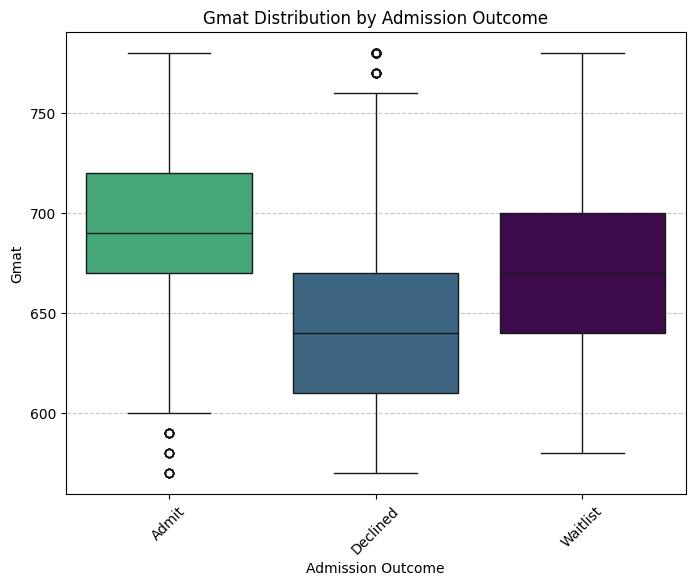

In [ ]:
gmat_summary = df.groupby("admission").agg(
    mean_gmat=pd.NamedAgg(column="gmat", aggfunc="mean"),
    median_gpa=pd.NamedAgg(column="gmat", aggfunc="median"),
    sd_gpa=pd.NamedAgg(column="gmat", aggfunc="std")
).reset_index()

# Visualization: GPA distribution by admission outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x="admission", y="gmat", data=df, palette={"Admit": "#35B779FF", "Waitlist": "#440154FF", "Declined": "#31688EFF"})
plt.title("Gmat Distribution by Admission Outcome")
plt.xlabel("Admission Outcome")
plt.ylabel("Gmat")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- Most admitted applicants have a GMAT score clustered around 700
- However, we do notice an overlap between GMAT ranges especially in the waitlisted section suggesting that other factors beyond just GMAT also play a role in the admission decision process.

In [ ]:
correlation2 = df["gmat"].corr(df["admission_binary"])
print("Correlation:", correlation2)

Correlation: 0.34831868364327606


Correlation is moderately postive which suggests a positive relationship between gmat scores and the likelihood of admission.

6.3- Is GMAT or GPA more important for admissions ?

 We will perform logistic regression to determine that

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression



# Fit the logistic regression model
model = LogisticRegression()
model.fit(df[['gpa', 'gmat']], df['admission_binary'])

# Print the model coefficients
print("Coefficients:")
print(f"GPA: {model.coef_[0][0]}")
print(f"GMAT: {model.coef_[0][1]}")

# Print the model intercept
print(f"Intercept: {model.intercept_[0]}")

# Evaluate the model performance
print("Model Performance:")
print(f"Accuracy: {model.score(df[['gpa', 'gmat']], df['admission_binary'])}")


Coefficients:
GPA: 2.6147374627538396
GMAT: 0.017355000370821924
Intercept: -21.980659399762
Model Performance:
Accuracy: 0.8500161446561189


**1-Coefficients:**

**GPA Coefficient:** The GPA coefficient is 2.6147374627538396. This means that for a one-unit increase in GPA, the log odds of admission (the dependent variable) increase by 2.6147374627538396, holding the GMAT score constant.

**GMAT Coefficient:** The GMAT coefficient is 0.017355000370821924. This means that for a one-unit increase in GMAT score, the log odds of admission increase by 0.017355000370821924, holding the GPA constant.

2- **Model Performance:**

The model accuracy is 0.8500161446561189, which means that the model correctly predicts the admission outcome (Admit or Declined) for 85% of the cases in the dataset.

->The GPA coefficient is much larger than the GMAT coefficient, indicating that GPA has a stronger impact on the probability of admission compared to GMAT score.
The high model accuracy of 85% suggests that the logistic regression model is performing well in predicting admission outcomes based on the given GPA and GMAT data.

b- **T-Tests: GPA and GMAT**
We perform t-tests to compare GPA and GMAT scores between admitted and denied applicants:


In [ ]:
from scipy.stats import ttest_ind



# T-test for GPA
admit_gpa = df[df['admission'] == 'Admit']['gpa']
deny_gpa = df[df['admission'] == 'Declined']['gpa']
t_test_result_gpa = ttest_ind(admit_gpa, deny_gpa)

print("T-test for GPA:")
print(f"t-statistic: {t_test_result_gpa.statistic}")
print(f"p-value: {t_test_result_gpa.pvalue}")

# T-test for GMAT
admit_gmat = df[df['admission'] == 'Admit']['gmat']
deny_gmat = df[df['admission'] == 'Declined']['gmat']
t_test_result_gmat = ttest_ind(admit_gmat, deny_gmat)

print("\nT-test for GMAT:")
print(f"t-statistic: {t_test_result_gmat.statistic}")
print(f"p-value: {t_test_result_gmat.pvalue}")

T-test for GPA:
t-statistic: 23.543307013351303
p-value: 2.2431157411324595e-117

T-test for GMAT:
t-statistic: 29.58020129360951
p-value: 8.373154591163128e-180


->This means that the difference in the mean GMAT  and mean GPA between the "Admit" and "Deny" groups is statistically significant.

c-Seperate logistic regression models :

In [ ]:
model_gpa = LogisticRegression()
model_gpa.fit(df[['gpa']], df['admission_binary'])

print("Logistic Regression Model for GPA:")
print(f"Coefficients: {model_gpa.coef_[0]}")
print(f"Intercept: {model_gpa.intercept_[0]}")
print(f"Accuracy: {model_gpa.score(df[['gpa']], df['admission_binary'])}")

# Logistic regression for GMAT only
model_gmat = LogisticRegression()
model_gmat.fit(df[['gmat']], df['admission_binary'])

print("\nLogistic Regression Model for GMAT:")
print(f"Coefficients: {model_gmat.coef_[0]}")
print(f"Intercept: {model_gmat.intercept_[0]}")
print(f"Accuracy: {model_gmat.score(df[['gmat']], df['admission_binary'])}")

Logistic Regression Model for GPA:
Coefficients: [5.43688452]
Intercept: -19.668749755343324
Accuracy: 0.8532450758798837

Logistic Regression Model for GMAT:
Coefficients: [0.02152016]
Intercept: -16.15096973902384
Accuracy: 0.8505004843396836


The seperate logistic regression models also indicate that GPA has a higher contribution to admission odds compared to GMATs.

d- checking for correlation:


In [ ]:
correlation3 = df["gmat"].corr(df["gpa"])
print("Correlation:", correlation3)

Correlation: 0.5775391334190766


The correlation is moderate but positive, indicating that higher GPA scores are associated with higher GMAT scores, though they are not perfectly correlated.

# Both GPA and GMAT are significant predictors of admission outcomes, with GPA showing a stronger effect in the logistic regression model. Correlation analysis indicates a moderate positive relationship between GPA and GMAT scores, but they should be considered **as separate factors in predicting admission.**

6.4- How do different majors affect admission outcomes?

In this section, we explore the influence of undergraduate majors on admission outcomes. By comparing the acceptance rates and trends associated with various fields of study, we aim to uncover any significant disparities that may exist and understand how majors impact applicants' chances of success.

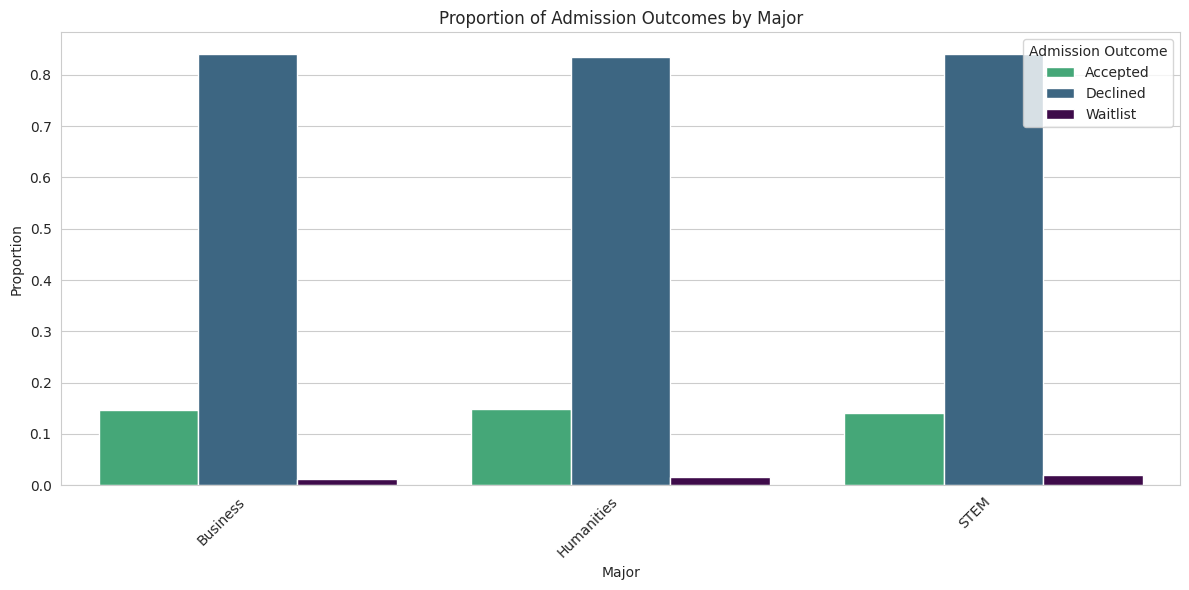

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a summary table of admission outcomes by major
admission_by_major = df.groupby('major')['admission'].value_counts(normalize=True).unstack().fillna(0)

# Rename columns for clarity
admission_by_major.columns = ['Accepted', 'Declined', 'Waitlist']

# Melt the table for easier plotting
admission_long = admission_by_major.reset_index().melt(id_vars='major', var_name='outcome', value_name='proportion')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='major', y='proportion', hue='outcome', data=admission_long, palette={'Accepted': '#35B779FF', 'Declined': '#31688EFF', 'Waitlist': '#440154FF'})
plt.title("Proportion of Admission Outcomes by Major")
plt.xlabel("Major")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title="Admission Outcome")
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

This indicates that, in this dataset, the undergraduate major does not play a significant role in influencing admission outcomes. Other factors, such as GPA, GMAT scores, and work experience, may be more influential in the admission process.

6.5- How do different work industries affect admission outcomes?

In this section, we investigate how the work industry background of applicants influences their admission outcomes. By analyzing the acceptance rates across various industries, we aim to identify trends that may indicate whether specific industries lead to higher or lower chances of being admitted to MBA programs.

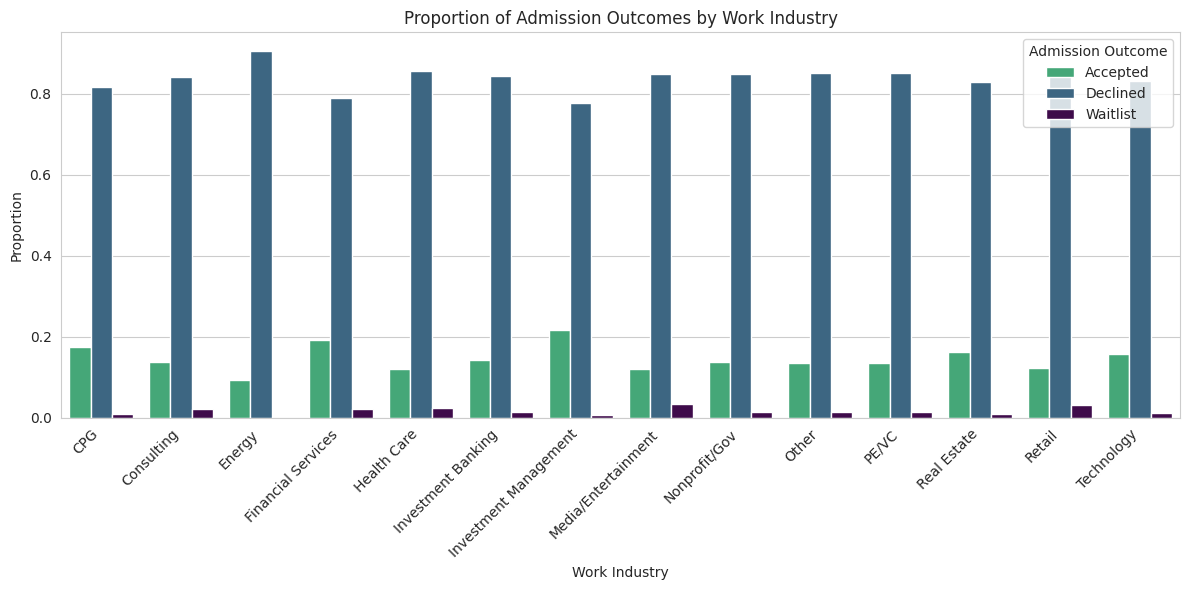

In [ ]:
# prompt:  bar plot displays the proportions of admission outcomes (admitted, waitlisted, denied) for each work industry.



# Create a summary table of admission outcomes by work industry
admission_by_industry = df.groupby('work_industry')['admission'].value_counts(normalize=True).unstack()

# Rename columns for clarity
admission_by_industry.columns = ['Accepted', 'Declined', 'Waitlist']

# Melt the table for easier plotting
admission_long = admission_by_industry.reset_index().melt(id_vars='work_industry', var_name='outcome', value_name='proportion')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='work_industry', y='proportion', hue='outcome', data=admission_long, palette={'Accepted': '#35B779FF', 'Declined': '#31688EFF', 'Waitlist': '#440154FF'})
plt.title("Proportion of Admission Outcomes by Work Industry")
plt.xlabel("Work Industry")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title="Admission Outcome")
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Investment Management, Financial Services, and CPG have the highest admit rates, indicating these industries may have a positive influence on admission.
Energy has the lowest admit rate, suggesting it might not align as strongly with admission criteria or preferences.

6.5- How Do Demographic Factors (Like Gender and Race) Influence Admission Outcomes?

In this section, we explore the influence of demographic factors, including gender and race, on admission outcomes. Through multinomial logistic regression analysis, we aim to uncover the relationships between these factors and their impact on applicants' chances of acceptance, waitlisting, or denial.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import mnlogit
import pandas as pd

# Convert 'admission' to categorical with numeric codes
df['admission_codes'] = pd.Categorical(df['admission']).codes

# Define the multinomial logistic regression model
# Use the new 'admission_codes' column
model = mnlogit('admission_codes ~ gender + race', data=df)

# Fit the model
results = model.fit()

# Print the summary of the results
print(results.summary())

# Access specific coefficients and p-values
print("\nCoefficients and p-values:")
print(results.params)
print(results.pvalues)

Optimization terminated successfully.
         Current function value: 0.482403
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:        admission_codes   No. Observations:                 6194
Model:                        MNLogit   Df Residuals:                     6180
Method:                           MLE   Df Model:                           12
Date:                Wed, 29 Jan 2025   Pseudo R-squ.:                 0.02455
Time:                        19:44:35   Log-Likelihood:                -2988.0
converged:                       True   LL-Null:                       -3063.2
Covariance Type:            nonrobust   LLR p-value:                 4.680e-26
    admission_codes=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.1895      0.089     13.320      0.000       1.014       1.

For rejection : Coefficient = 0.759 (p = 9.94 × 10⁻⁸, highly significant).
→ Black applicants are more likely to be rejected compared to others.

Hispanic:

For rejection : Coefficient = 0.561 (p = 3.54 × 10⁻²⁸, highly significant).
→ Hispanic applicants are more likely to be rejected.

Other Races (Not Disclosed, Other, White):

All p-values > 0.05 → Not significant
Meaning: These racial categories do not significantly impact admission or rejection.

Final Conclusion:
Males are significantly more likely to be rejected but gender does not influence admission.

Black and Hispanic applicants are significantly more likely to be rejected but race does not influence admission. Let’s take a closer look at these trends through visualizations.

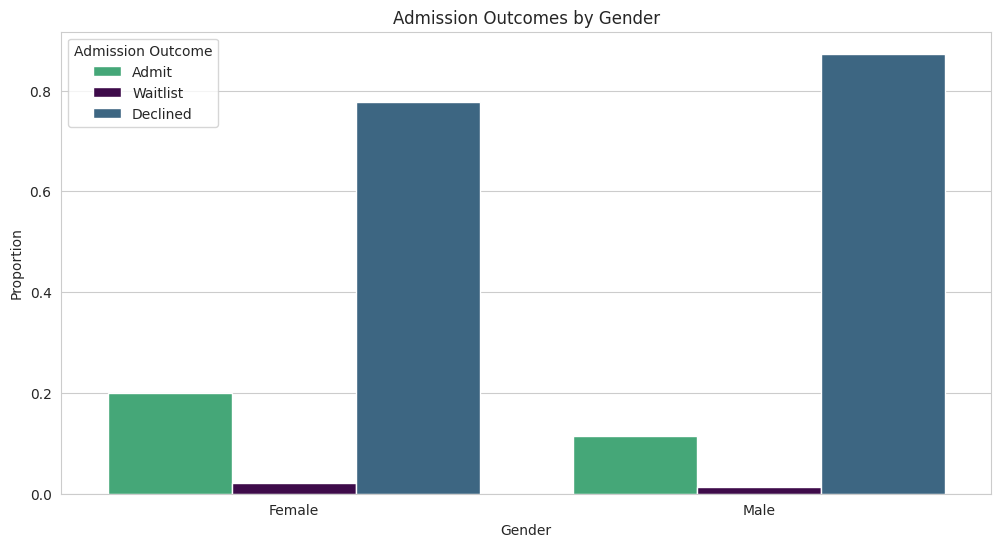

In [ ]:
admission_by_gender = df.groupby('gender')['admission'].value_counts(normalize=True).rename('proportion').reset_index()

plt.figure(figsize=(12, 6))
# Use admission_by_gender as the data source
# Set dodge=True and correct hue_order to match data values
sns.barplot(x='gender', y='proportion', hue='admission', data=admission_by_gender, hue_order=['Admit', 'Waitlist', 'Declined'], dodge=True, palette=["#35B779FF", "#440154FF", "#31688EFF"])

plt.title("Admission Outcomes by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title="Admission Outcome")

sns.set_style("whitegrid")

plt.show()

the proportion of admitted applicants among women is higher than among men

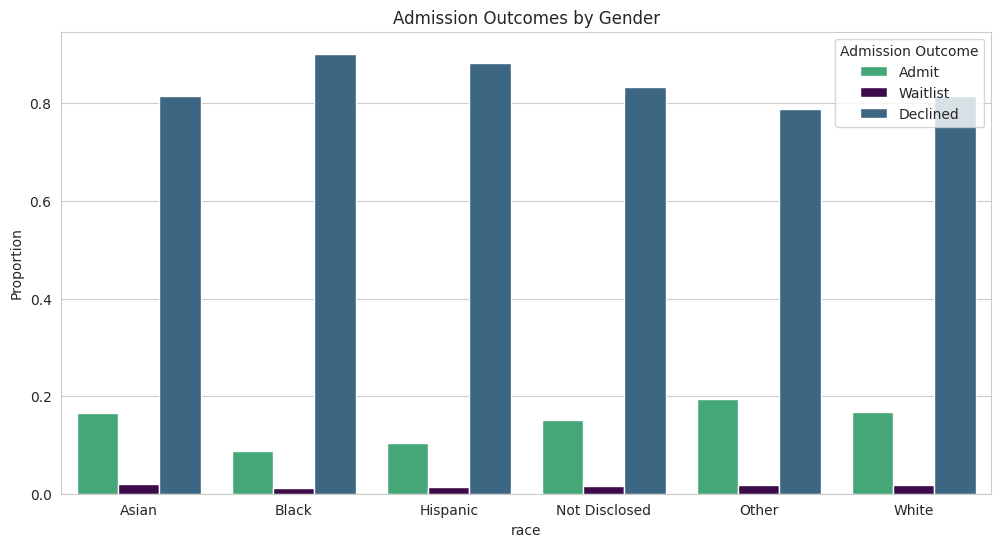

In [ ]:
admission_by_race = df.groupby('race')['admission'].value_counts(normalize=True).rename('proportion').reset_index()

plt.figure(figsize=(12, 6))
# Use admission_by_gender as the data source
# Set dodge=True and correct hue_order to match data values
sns.barplot(x='race', y='proportion', hue='admission', data=admission_by_race, hue_order=['Admit', 'Waitlist', 'Declined'], dodge=True, palette=["#35B779FF", "#440154FF", "#31688EFF"])

plt.title("Admission Outcomes by Gender")
plt.xlabel("race")
plt.ylabel("Proportion")
plt.legend(title="Admission Outcome")

sns.set_style("whitegrid")

plt.show()

The bar plot visualization reveals that applicants identifying as Black or Hispanic have lower admit rates compared to other racial groups.

6.6- Admission Rates: International vs. Domestic Students
In this section, we compare the admission rates of international and domestic students. A bar plot visualizes the differences in these rates, shedding light on whether international students encounter any disadvantages during the admission process.

<ipython-input-85-7ede10447af0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='international_label', y='admission_rate', data=admission_rates_international, palette=["#35B779FF"])
<ipython-input-85-7ede10447af0>:13: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='international_label', y='admission_rate', data=admission_rates_international, palette=["#35B779FF"])


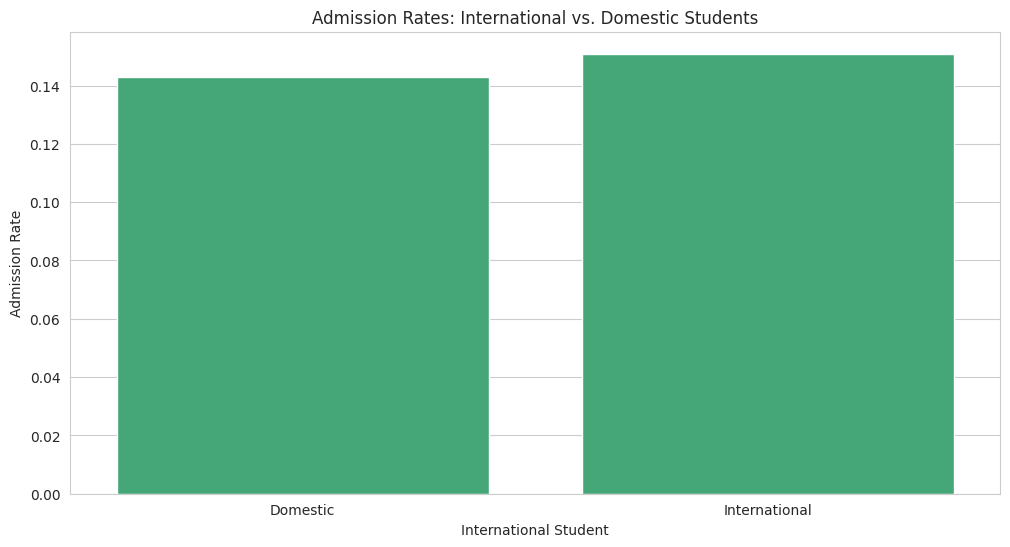

In [ ]:

df['international_label'] = df['international'].apply(lambda x: 'International' if x else 'Domestic')

admission_rates_international = df.groupby('international_label').agg({
    'admission': ['count', lambda x: (x == 'Admit').sum()]
}).reset_index()

admission_rates_international.columns = ['international_label', 'total_applicants', 'total_admitted']
admission_rates_international['admission_rate'] = admission_rates_international['total_admitted'] / admission_rates_international['total_applicants']

# Visualization: Admission rates for international vs. domestic students
plt.figure(figsize=(12, 6))
sns.barplot(x='international_label', y='admission_rate', data=admission_rates_international, palette=["#35B779FF"])

plt.title("Admission Rates: International vs. Domestic Students")
plt.xlabel("International Student")
plt.ylabel("Admission Rate")
plt.xticks(rotation=0)

sns.set_style("whitegrid")

plt.show()





International students have slightly higher admission rates than domestic students.

6.7- What factor is the most important :

<ipython-input-87-e8754ea3cb6a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='international_label', y='admission_rate', data=admission_rates_international, palette=["#35B779FF"])
<ipython-input-87-e8754ea3cb6a>:16: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='international_label', y='admission_rate', data=admission_rates_international, palette=["#35B779FF"])


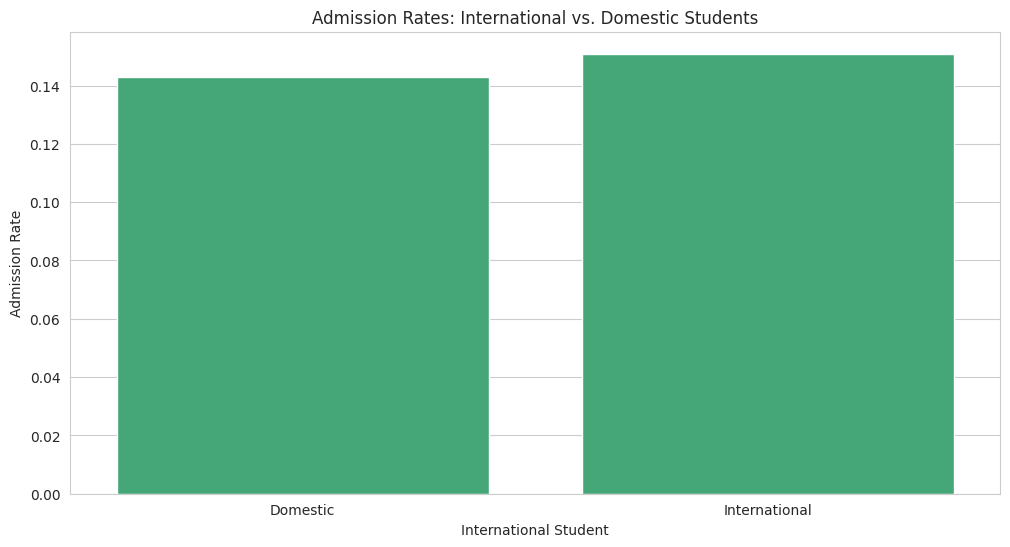

<ipython-input-87-e8754ea3cb6a>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.index, y=feature_importances.values, palette="Blues_d")


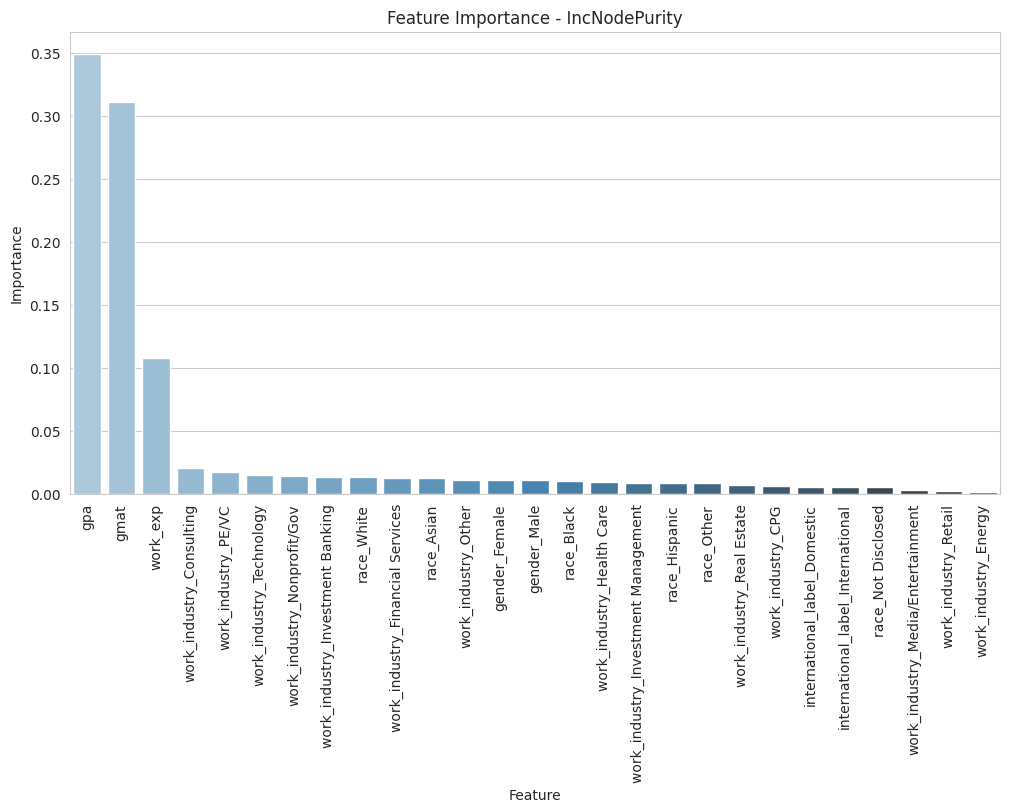

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


df['international_label'] = df['international'].apply(lambda x: 'International' if x else 'Domestic')

admission_rates_international = df.groupby('international_label').agg({
    'admission': ['count', lambda x: (x == 'Admit').sum()]
}).reset_index()

admission_rates_international.columns = ['international_label', 'total_applicants', 'total_admitted']
admission_rates_international['admission_rate'] = admission_rates_international['total_admitted'] / admission_rates_international['total_applicants']

# Visualization: Admission rates for international vs. domestic students
plt.figure(figsize=(12, 6))
sns.barplot(x='international_label', y='admission_rate', data=admission_rates_international, palette=["#35B779FF"])

plt.title("Admission Rates: International vs. Domestic Students")
plt.xlabel("International Student")
plt.ylabel("Admission Rate")
plt.xticks(rotation=0)

sns.set_style("whitegrid")

plt.show()





from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define categorical features for one-hot encoding
categorical_features = ['gender', 'race', 'work_industry', 'international_label']

# Create a ColumnTransformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['gpa', 'gmat', 'work_exp']),  # Numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)  # Categorical features
    ])


X = df[['gpa', 'gmat', 'gender', 'race', 'work_exp', 'work_industry', 'international_label']]
y = df['admission_binary']

# Preprocess the data using the ColumnTransformer
X_encoded = preprocessor.fit_transform(X)


# Get feature names after one-hot encoding
feature_names = list(preprocessor.named_transformers_['num'].get_feature_names_out()) + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

# Convert the encoded data back to a DataFrame with appropriate column names
X_encoded = pd.DataFrame(X_encoded, columns=feature_names, index=X.index)


# Fit the random forest model using the encoded data
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_encoded, y)

# Plotting feature importance based on IncNodePurity
feature_importances = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.index, y=feature_importances.values, palette="Blues_d")
plt.title("Feature Importance - IncNodePurity")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=90)

plt.show()


 The plot displays the importance of each feature based on IncNodePurity. The GPA score emerges as the most influential factor, followed by GMAT.

Other factors like gender, race, and work experience have lesser influence on admission decisions according to the model.

#  Conclusion
In this analysis of MBA admissions data, we identified key factors influencing admission outcomes. Our findings highlighted the significance of GPA and GMAT scores, with demographic factors like gender and race also playing a critical role.

We figured that hispanic and black applicants still have lower chances of being admitted, that the number of female applicants are lower than male ones and they have higher admission proportions compared to males.

- We also figured that undergraduate major choice doesn't have a substantial influence. However, work industry has a higher effect on acceptance odds with finance and wealth management and the forefront of accepted applicants.

 Additionally, the comparison between international and domestic students revealed minimal differences in admission rates.

  Overall, this study provides valuable insights for prospective applicants and educational institutions alike, emphasizing the importance of fair evaluation methods.